# Setting

In [2]:
!pip install pandas


[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import json

In [4]:
import pandas as pd

In [5]:
import requests


In [6]:
import math

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import matplotlib.pyplot as plt

In [9]:
from time import sleep

In [10]:
username = "doanminhbao10@gmail.com"
password = "minhbao@2305"

# Create a session to persistently store the headers
s = requests.Session()

# Save credentials into session
s.auth = (username, password)

# Send a POST request to the /authentication API
response = s.post('https://api.worldquantbrain.com/authentication')

# Biometrics

In [28]:
username = "doanminhbao10@gmail.com"
password = "minhbao@2305"

# Create a session to persistently store the headers
s = requests.Session()

# Save credentials into session
s.auth = (username, password)

# Send a POST request to the /authentication API
response = s.post('https://api.worldquantbrain.com/authentication')

from urllib.parse import urljoin

# Check status code for next action
if response.status_code == requests.status_codes.codes.unauthorized:
    if response.headers["WWW-Authenticate"] == "persona":
        # Outputs the URL to access through the browser to complete biometrics authentication
        print(urljoin(response.url, response.headers["Location"]))
        input("Complete biometrics authentication and press any key to continue: " + urljoin(response.url, response.headers["Location"]))       
        s.post(urljoin(response.url, response.headers["Location"]))
    else:
        print("incorrect email and password")
        

https://api.worldquantbrain.com/authentication/persona?inquiry=inq_RwBHxGRpgGAoRbcHgCcf8n2b


# Create Alpha

In [29]:
simulation_data = {
    'type': 'REGULAR',
    'settings': {
        'instrumentType': 'EQUITY',
        'region': 'USA',
        'universe': 'TOP3000',
        'delay': 1,
        'decay': 1,
        'neutralization': 'SUBINDUSTRY',
        'truncation': 0.08,
        'pasteurization': 'ON',
        'unitHandling': 'VERIFY',
        'nanHandling': 'OFF',
        'language': 'FASTEXPR',
        'visualization': False,
    },
    'regular': 'close'  # Dòng nhập alpha
}
simulation_response = s.post('https://api.worldquantbrain.com/simulations', json=simulation_data)
simulation_response

<Response [201]>

# Run Alpha

In [13]:

from time import sleep

simulation_progress_url = simulation_response.headers['Location']
finished = False
while True:
    simulation_progress = s.get(simulation_progress_url)
    if simulation_progress.headers.get("Retry-After", 0) == 0:
        break
    print("Sleeping for " + simulation_progress.headers["Retry-After"] + " seconds")
    sleep(float(simulation_progress.headers["Retry-After"]))
print("Alpha done simulating, getting alpha details")
alpha_id = simulation_progress.json()["alpha"]
alpha = s.get("https://api.worldquantbrain.com/alphas/" + alpha_id)

KeyError: 'location'

# PnL Chart

In [ ]:
from time import sleep

finished = False
while True:
    pnl = s.get("https://api.worldquantbrain.com/alphas/" + alpha_id + "/recordsets/pnl")
    if pnl.headers.get("Retry-After", 0) == 0:
        break
    print("Sleeping for " + pnl.headers["Retry-After"] + " seconds")
    sleep(float(pnl.headers["Retry-After"]))
print("PnL retrieved")

Sleeping for 1.0 seconds
PnL retrieved


In [ ]:
pnl.json()

{'schema': {'name': 'pnl',
  'title': 'PnL',
  'properties': [{'name': 'date', 'title': 'Date', 'type': 'date'},
   {'name': 'pnl', 'title': 'PnL', 'type': 'amount'}]},
 'records': [['2011-04-07', 7940.0],
  ['2011-04-08', 41741.0],
  ['2011-04-11', 80196.0],
  ['2011-04-12', 125241.0],
  ['2011-04-13', 80445.0],
  ['2011-04-14', 100389.0],
  ['2011-04-15', 83286.0],
  ['2011-04-18', 108976.0],
  ['2011-04-19', 162400.0],
  ['2011-04-20', 200462.0],
  ['2011-04-21', 240554.0],
  ['2011-04-25', 212472.0],
  ['2011-04-26', 189286.0],
  ['2011-04-27', 187144.0],
  ['2011-04-28', 143988.0],
  ['2011-04-29', 149003.0],
  ['2011-05-02', 172477.0],
  ['2011-05-03', 192887.0],
  ['2011-05-04', 197235.0],
  ['2011-05-05', 134002.0],
  ['2011-05-06', 142293.0],
  ['2011-05-09', 158332.0],
  ['2011-05-10', 111217.0],
  ['2011-05-11', 144193.0],
  ['2011-05-12', 146713.0],
  ['2011-05-13', 169824.0],
  ['2011-05-16', 195135.0],
  ['2011-05-17', 193231.0],
  ['2011-05-18', 176837.0],
  ['2011-05-19

<Axes: xlabel='Day'>

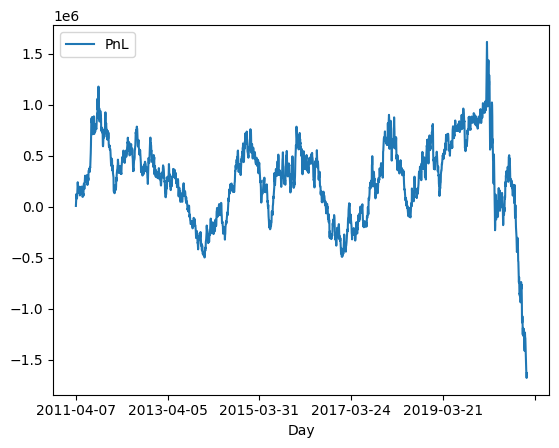

In [ ]:
pnl_df = pd.DataFrame(pnl.json()["records"], columns=["Day", "PnL"])
pnl_df.plot(x = "Day", y = "PnL")


# Alpha result

In [ ]:
alpha_d = alpha.json()
print(alpha_d["is"])

{'pnl': -1617455, 'bookSize': 20000000, 'longCount': 1111, 'shortCount': 1925, 'turnover': 0.0155, 'returns': -0.0164, 'drawdown': 0.3297, 'margin': -0.002125, 'fitness': -0.08, 'sharpe': -0.21, 'checks': [{'name': 'LOW_SHARPE', 'result': 'FAIL', 'limit': 1.58, 'value': -0.21}, {'name': 'LOW_FITNESS', 'result': 'FAIL', 'limit': 1.0, 'value': -0.08}, {'name': 'LOW_TURNOVER', 'result': 'PASS', 'limit': 0.01, 'value': 0.0155}, {'name': 'HIGH_TURNOVER', 'result': 'PASS', 'limit': 0.7, 'value': 0.0155}, {'name': 'CONCENTRATED_WEIGHT', 'result': 'FAIL', 'date': '2018-02-01', 'limit': 0.1, 'value': 0.229644}, {'name': 'LOW_SUB_UNIVERSE_SHARPE', 'result': 'FAIL', 'limit': -0.09, 'value': -0.15}, {'name': 'SELF_CORRELATION', 'result': 'PENDING'}, {'name': 'PROD_CORRELATION', 'result': 'PENDING'}, {'name': 'REGULAR_SUBMISSION', 'result': 'PENDING'}, {'name': 'MATCHES_THEMES', 'result': 'WARNING', 'matched': [], 'unmatched': [{'id': 'V41OkBM', 'name': 'Global Delay-1', 'multiplier': 5.0}]}, {'nam

# Many Alpha

Setting list  

In [21]:
# Neutralization option
neutral_l = ['SUBINDUSTRY', 'INDUSTRY', 'SECTOR','MARKET', 'NONE']
universe_l = ['TOP3000','TOP2000','TOP1000','TOP500','TOP200','ILLIQUID_MINVOL1M','SECTOR_UTILITIES_TOP3000',
              'TOP1200','TOP600','TOP800','TOP400','TOP100']
region_l = ['EUR','GLB','USA','ASI','CHN','KOR','TWN','HKG']

Sử dụng list 101 Alpha


In [24]:
alpha_l = []
with open('101_alpha.txt', 'r') as file:
    # Read file line by line
    for line in file:
        alpha_l.append(line.strip())  # Use strip() to remove newline characters

Alpha loop

In [30]:
for neutralization in neutral_l:
    for decay in range(2, 10, 2):
        for universe in universe_l:
            for region in region_l:
                for alpha_101 in alpha_l:             
                    simulation_data = {
                        'type': 'REGULAR',
                        'settings': {
                            'instrumentType': 'EQUITY',
                            'region': region,
                            'universe': universe,
                            'delay': 1,
                            'decay': decay,
                            'neutralization': neutralization,
                            'truncation': 0.08,
                            'pasteurization': 'ON',
                            'unitHandling': 'VERIFY',
                            'nanHandling': 'OFF',
                            'language': 'FASTEXPR',
                            'visualization': False,
                        },
                        'regular': alpha_101  # Dòng nhập alpha
                    }
                    simulation_response = s.post('https://api.worldquantbrain.com/simulations', json=simulation_data)
                    print(simulation_response)
                    print(region, universe,alpha_101,decay)
                    # print(alpha_101)

                    if simulation_response.status_code != 201:
                        continue 

                    simulation_progress_url = simulation_response.headers['Location']
                    finished = False
                    while True:
                        simulation_progress = s.get(simulation_progress_url)
                        if simulation_progress.headers.get("Retry-After", 0) == 0:
                            break
                        # print("Sleeping for " + simulation_progress.headers["Retry-After"] + " seconds")
                        sleep(float(simulation_progress.headers["Retry-After"]))
                    # print("Alpha done simulating, getting alpha details")
                    alpha_id = simulation_progress.json()["alpha"]
                    alpha = s.get("https://api.worldquantbrain.com/alphas/" + alpha_id)


                    alpha_d = alpha.json()
                    
                    # Check alpha có submit được không
                    test_pass = 0
                    for i  in range (0,6):
                        # print(alpha_d['is']['checks'][i]['result'])
                        if(alpha_d['is']['checks'][i]['result'] == 'PASS'):
                            test_pass = test_pass + 1
                    # print(alpha_d['is']['checks'][-1]['result'])
                    if(alpha_d['is']['checks'][-1]['result'] == 'PASS'):
                            test_pass = test_pass + 1

                    print('Pass', test_pass, 'test')
                    print(alpha_d)
                    
                    if(test_pass >= 6):
                        print('Pass', test_pass, 'test')
                        print(alpha_d)
                        print(alpha_101)
                        if(test_pass == 7): 
                            print('************************SUBMIT ALPHA NOW !!!************************')
            

<Response [400]>
EUR TOP3000 (-1 * correlation(rank(delta(log(volume), 2)), rank(((close - open) / open)), 6)) 2
<Response [400]>
EUR TOP3000 (-1 * correlation(rank(open), rank(volume), 10)) 2
<Response [400]>
EUR TOP3000 (-1 * Ts_Rank(rank(low), 9)) 2
<Response [400]>
EUR TOP3000 (rank((open - (sum(vwap, 10) / 10))) * (-1 * abs(rank((close - vwap))))) 2
<Response [400]>
EUR TOP3000 (-1 * correlation(open, volume, 10)) 2
<Response [400]>
EUR TOP3000 ((adv20 < volume) ? ((-1 * ts_rank(abs(delta(close, 7)), 60)) * sign(delta(close, 7))) : (-1 * 1)) 2
<Response [400]>
EUR TOP3000 (-1 * rank(((sum(open, 5) * sum(returns, 5)) - delay((sum(open, 5) * sum(returns, 5)), 10)))) 2
<Response [400]>
EUR TOP3000 ((0 < ts_min(delta(close, 1), 5)) ? delta(close, 1) : ((ts_max(delta(close, 1), 5) < 0) ? delta(close, 1) : (-1 * delta(close, 1)))) 2
<Response [400]>
EUR TOP3000 rank(((0 < ts_min(delta(close, 1), 4)) ? delta(close, 1) : ((ts_max(delta(close, 1), 4) < 0) ? delta(close, 1) : (-1 * delta(cl

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))